# 代码回顾

In [249]:
programs = read_pkl(datapath+'programs.pkl')

SyntaxError: invalid syntax (<string>, line 1)

## read_pkl()

In [1]:
import sys
# This is not required if you've installed pycparser into your site-packages/ with setup.py
sys.path.extend(['/home/bfs/cct/astnn/pycparser-master'])
import pycparser

if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import _pickle as pickle

import os

# 字节bytes转化kb\m\g
def formatSize(bytes):
    try:
        bytes = float(bytes)
        kb = bytes / 1024
    except:
        print("input error")
        return "Error"

    if kb >= 1024:
        M = kb / 1024
        if M >= 1024:
            G = M / 1024
            return "%.2fG" % (G)
        else:
            return "%.2fM" % (M)
    else:
        return "%.2fkb" % (kb)
    klyr
def read_pkl(fname, p=True):
    with open(fname, 'rb') as f:
        if sys.version_info[0] == 2:
            data = pickle.load(f)
        else:
            data = pickle.load(f, encoding='iso-8859-1')
    if p:
        print('read over! size: %s (%s)' % (formatSize(os.path.getsize(fname)), fname))
    return data

datapath = 'classification/data/'


# 变量名分析

In [27]:
from gensim.models.word2vec import Word2Vec

# w2v = Word2Vec.load(datapath+"train/embedding/node_w2v_128.model")  # OJ 数据集 (8188, 128)
# w2v = Word2Vec.load("vuldetect/data/train/embedding/node_w2v_128.model")  # cwe119 数据集 
# model_w2v = Word2Vec.load('data/embedding_cwe399_128.model')  # cwe399 数据集  (438, 128)

vectors = model_w2v.wv.vectors
vectors.shape  # (8188, 128)

vocab = model_w2v.wv.vocab
# i = [vocab[x].index for x in vocab.keys()]


# model_w2v.wv.most_similar("main")  # 找最相似的词
# model_w2v.wv.get_vector("main")  # 查看某个 token 的向量
# model_w2v.wv.vectors  # 查看向量矩阵
# model_w2v.wv.vocab  # 查看词和对应向量，字典
model_w2v.wv.index2word  # 所有词。序号对应了该词的 index
tokens = model_w2v.wv.index2word
print(tokens)

['Typedef', 'int', 'Decl', 'FuncDecl', 'void', 'ParamList', 'PtrDecl', 'size_t', 'data', 'FuncCall', 'ExprList', 'Compound', 'End', 'char', 'wchar_t', 'unsigned', '0', '=', 'If', 'uint32_t', 'bytes', 'numBytes', 'twoIntsStruct', 'int64_t', 'Typename', 'TypeDecl', '1', 'xcb_connection_t', 'line', 'hex', '-', '==', 'ArrayRef', 'sizeof', '*', '100', 'i', 'Cast', 'long', 'printline', 'FuncDef', 'FILE', 'FileAST', '__builtin_va_list', '__gnuc_va_list', 'va_list', '__int8_t', '__uint8_t', '__int16_t', '__uint16_t', '__int_least16_t', '__uint_least16_t', '__int32_t', '__uint32_t', '__int64_t', '__uint64_t', '__int_least32_t', '__uint_least32_t', '__s8', '__u8', '__s16', '__u16', '__s32', '__u32', '__s64', '__u64', '_LOCK_T', '_LOCK_RECURSIVE_T', '_off_t', '__dev_t', '__uid_t', '__gid_t', '_off64_t', '_fpos_t', '_ssize_t', 'wint_t', '_mbstate_t', '_flock_t', '_iconv_t', '__ULong', '__FILE', 'ptrdiff_t', '__off_t', '__pid_t', '__loff_t', 'u_char', 'u_short', 'u_int', 'u_long', 'ushort', 'uint',

In [48]:
'''是否包含所有变量名？


没有：
    函数名, atoi
    结构体：charVoid structCharVoid;
    变量名：buffer
    关键词：while，else，break

有：
    函数名：globalReturnsTrue, printLine
    变量名：inputBuffer，data，recvResult
    结构体：sockaddr_in，service
    关键词：int，char
    常量：staticTrue，staticFalse，STATIC_CONST_TRUE
'''

vocab['sockaddr_in']

## bitbcnn 生成的 ast

In [60]:
'''
tokens: 不包含变量名、函数名等等
大部分 tokens 是 c/c++ 关键词。
但是如何生成的不知道。

vec_cwe119_cleaned.pkl 数据结构：(embed, NODE_MAP)
    embed: numpy.ndarray 对象, shape (388, 30)，即 387 节点的嵌入向量，向量 30 维度
        更正：(386L, 30L)，一共是386个节点的嵌入向量，srcml_node_map.tsv 中是 386
    NODE_MAP: dict 对象, 节点数字 与 节点名称 的映射表，如 '344': 'REF'
'''

import _pickle as pickle

v = '/home/bfs/cct/bitbcnn/vec_cwe119_cleaned.pkl'
with open(v, 'rb') as f:
    data = pickle.load(f, encoding='iso-8859-1')
tokens = list(data[1].values())
tokens = [x.lower() for x in tokens]
print(tokens)

['ref', 'unit_kind', 'lock', 'is', 'strictfp', 'nullliteral', 'assert', 'foreach', 'internal', 'sealed', 'return', 'include', 'nullptr', 'void', 'constexpr', 'thread_local', 'cxx_catch', 'cxx_class', 'crestrict', 'cxx_try', 'value', 'escape', 'cpp_region', 'cpp_empty', 'using_stmt', 'cpp_endregion', 'cpp_then', 'cpp_ifndef', 'cpp_elif', 'cpp_else', 'omp_argument_list', 'omp_argument', 'omp_expression', 'end_element_token', 'main', 'break', 'continue', 'while', 'do', 'for', 'class', 'class_declaration', 'krparameter_list', 'krparameter', 'parameter_list', 'parameter', 'pseudo_parameter_list', 'indexer_parameter_list', 'argument_list', 'argument', 'event', 'operator_function_decl', 'interface_defn', 'struct_decl', 'struct_defn', 'union_decl', 'operator_function', 'using', 'access_region', 'interface_decl', 'native', 'synchronized', 'final', 'finally', 'super', 'abstract', 'mutable', 'const', 'transient', 'volatile', 'out', 'comment', 'return_statement', 'function_specifier', 'switch', 'l

## ASTNN CWE tokens

In [137]:
'''词汇分析

'''
# corpus_119 = pd.read_pickle('data/cwe119_c_all.pkl')['corpus']
# corpus_399 = pd.read_pickle('data/cwe399_c_all.pkl')['corpus']

# # 每个样本的 tokens 数量
# corpus_119_len = [len(x) for x in corpus_119]
# corpus_399_len = [len(x) for x in corpus_399]
# # 每个样本的tokens去重后的数量
# corpus_119_unique_len = [len(set(x)) for x in corpus_119]
# corpus_399_unique_len = [len(set(x)) for x in corpus_399]

# corpus_119_unique = [x for item in corpus_119 for x in item.split(' ')]  # 共 1325,0245 个 tokens, 467 个不同 tokens
# corpus_399_unique = [x for item in corpus_399 for x in item.split(' ')]  # 共 352,0295 个 tokens,454 个不同 tokens
# corpus_cwe = set(corpus_119_unique) | set(corpus_399_unique)  # 共 593 个不同的 tokens
# corpus_119sub399 = set(corpus_119_unique) - set(corpus_399_unique)  # 85
# corpus_399sub119 = set(corpus_399_unique) - set(corpus_119_unique)  # 72
# 说明 cwe119 和 cwe 399 的 tokens 差异还是挺大的

print(list(corpus_cwe))

['3', 'uint_least16_t', 'End', '"r"', '__uint_least32_t', 'inet_addr', 'pthread_mutexattr_t', 'destLen', 'inputBuffer', 'ssize_t', 'fgetws', 'or', 'uid_t', 'uint_least8_t', '"AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"', '16', 'linkedlistprev', 'GLOBAL_CONST_FIVE', '__uint16_t', 'socket', 'staticreturnstrue', 'MirSurfaceSpec', 'pthread_attr_t', '__s16', 'globalArgc', 'cookie_close_function_t', 'getenv', '*', 'L"AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"', 'Default', '_fpos_t', 'wideChar', 'myString', '"/tmp/file.txt"', 'databadbuffer', 'longNumber', 'databuffer', 'sizeTNumber', 'staticfalse', 'listensocket', 'wcscpy', 'rlim_t', 'failed."', 'htons', 'intone', 'match!"', '__gnuc_va_list', 'destlen', '^', 'wcsncat', 'cookie_write_function_t', 'z_stream', '"127.0.0.1"', 'structCharVoid', 'data', '__pid_t', 'lldiv_t', 'voidSecond', 'While', '"New', '1.7E300', 'String"', 'printintline', 'uintmax_t', 'L"hello"', 'int_fast8_t', 'pid_t', '&&', 'pthread_rwlockattr_t', 'strncpy', 'doubleNumber',

### 分词

In [184]:
'''分词
拆分 tokens 规则:
规则1: 驼峰命名法
规则2: 下划线" _"分割法,
规则3: 去除特殊字符,%,",|,/,\ 等
结果：原 593 个 tokens 拆分后，只有 392个元 token，效果还不错。
待改进：FileAST被拆成Fi和leAST，int被拆成in和t。
'''
# corpus_cwe_splited = [x for item in list(map(wj.split, corpus_cwe)) for x in item]  # 共 392 个子 tokens
print(set(corpus_cwe_splited))
len(set(corpus_cwe_splited))

{'3', 'End', 'Window', 'chr', 'max', 'd', 're', 'New', 'write', 'FIVE', 'wide', 'or', 'Config', '16', 'bu', 'match', 'Prev', 'pid', 'socket', 'dev', 'Second', 'oc', 'String', 'off', 'Native', 'first', 'Default', 'rd', 'sw', 'RECURSIVE', 'connection', 'surface', 'struct', 'lim', 'sn', 'copy', 'intone', 'real', 'data', 'While', 'We', 'two', 'helper', 'clock', 'AAAAAA', 'schr', 'dup', 'z', 'wc', 'Character', 'rcp', 'tcp', 'negative', 'st', 'pos', 'Empty', 'oca', 'Two', 'div', 'Bad', 'float', '149', 'Def', 'Display', 'length', 'xc', 'seek', 'icon', 'Persistent', 'unsigned', 'to', 'failed', 'it', 'toul', 'If', 'Type', 'rand', 'size', 'true', 'Number', 'i', 'Short', 'persistent', 'bind', 'move', 'Arg', 'False', 'Good', 'L', 't', 'cond', 'session', 'Switch', 'spin', 'List', 'gnu', 'key', "'", 'sock', 'Ref', 'va', 'ADD', 'py', 'port', '30', 'types', 'Array', 'cast', 'Next', 'su', 'listen', 'hello', 'Connection', 'Mir', 'FILE', 'second', 'E', 'cDe', 'mem', 'out', '127', 'ts', 'fixed', 'FALSE', 

392

In [177]:
# 英文复合单词拆分工具 wordninja

import wordninja as wj
wordninja.split('reversedString')
wordninja.split('globalreturnstrueorfalse')
wordninja.split('_LOCK_RECURSIVE_T')
wordninja.split('%zu')
wordninja.split('fgetws()')
wordninja.split('"r"')
wordninja.split('AAAAAAAAAA')
wordninja.split('"BadSource_open.txt"')
wordninja.split('L"hello"')

list(map(wordninja.split, ['sogood', 'notbad'])) 


[['so', 'good'], ['not', 'bad']]

## CWE 数据集 tokens 数量分布

<IPython.core.display.Javascript object>


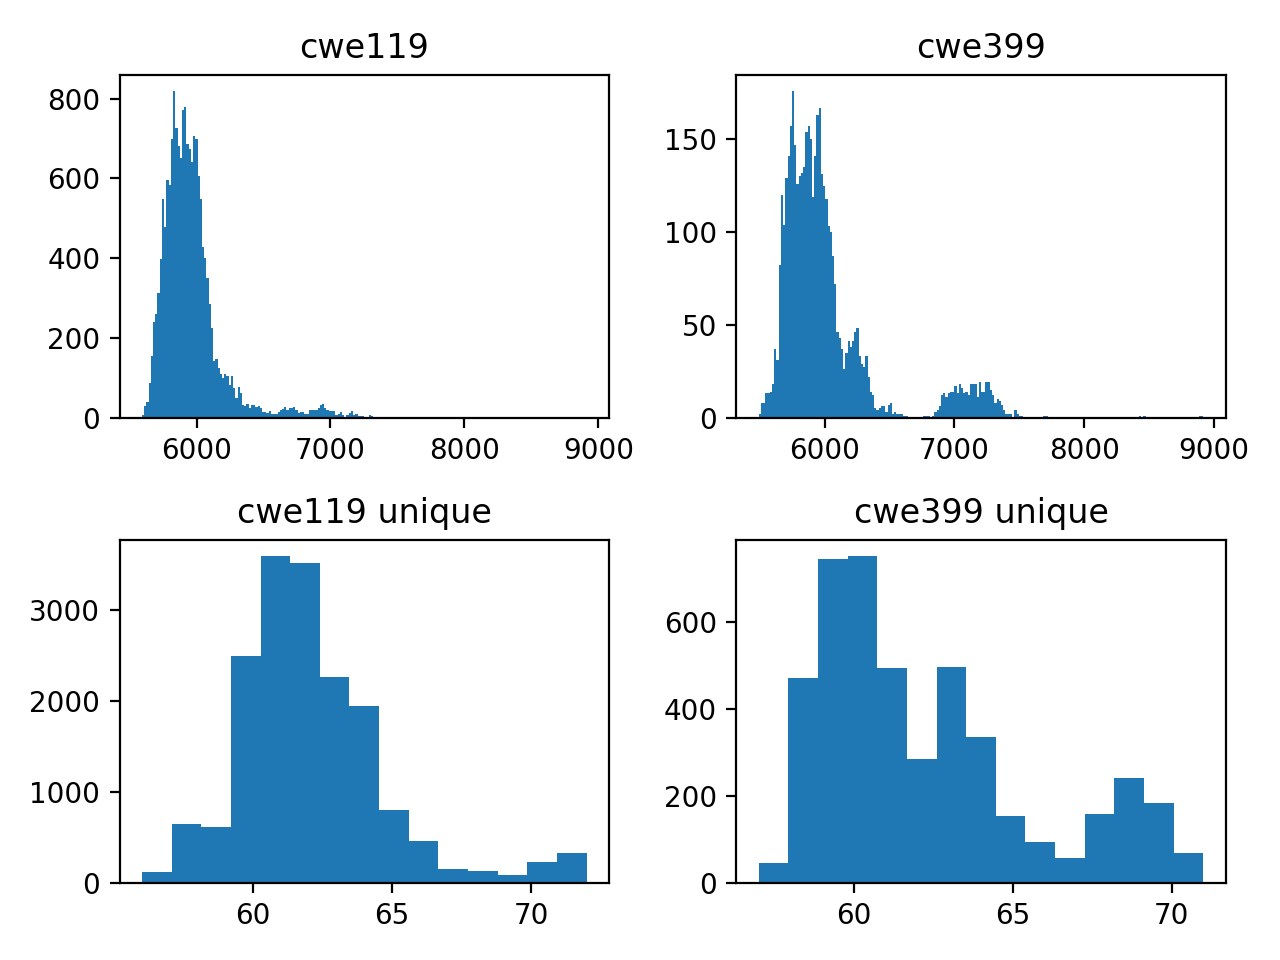

In [81]:
"""直方图分析，每个样本的 tokens 个数
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
"""
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure(1) # 创建第一个画板（figure）
plt.subplot(221) # 第一个画板的第一个子图
plt.hist(corpus_119_len,bins=200)
plt.title('cwe119')
plt.subplot(222) # 第二个画板的第二个子图
plt.hist(corpus_399_len,bins=200)
plt.title('cwe399')
plt.subplot(223) # 第一个画板的第一个子图
plt.hist(corpus_119_unique_len,bins=15)
plt.title('cwe119 unique')
plt.subplot(224) # 第二个画板的第二个子图
plt.hist(corpus_399_unique_len,bins=15)
plt.title('cwe399 unique')

plt.tight_layout()  # 自动调整子图间隔

plt.show()

## meta-token 词嵌入

In [192]:
tmp[0]

['FileAST',
 'Typedef',
 'size_t',
 'int',
 'Typedef',
 '__builtin_va_list',
 'int',
 'Typedef',
 '__gnuc_va_list',
 'int',
 'Typedef',
 'va_list',
 'int',
 'Typedef',
 '__int8_t',
 'int',
 'Typedef',
 '__uint8_t',
 'int',
 'Typedef',
 '__int16_t',
 'int',
 'Typedef',
 '__uint16_t',
 'int',
 'Typedef',
 '__int_least16_t',
 'int',
 'Typedef',
 '__uint_least16_t',
 'int',
 'Typedef',
 '__int32_t',
 'int',
 'Typedef',
 '__uint32_t',
 'int',
 'Typedef',
 '__int64_t',
 'int',
 'Typedef',
 '__uint64_t',
 'int',
 'Typedef',
 '__int_least32_t',
 'int',
 'Typedef',
 '__uint_least32_t',
 'int',
 'Typedef',
 '__s8',
 'int',
 'Typedef',
 '__u8',
 'int',
 'Typedef',
 '__s16',
 'int',
 'Typedef',
 '__u16',
 'int',
 'Typedef',
 '__s32',
 'int',
 'Typedef',
 '__u32',
 'int',
 'Typedef',
 '__s64',
 'int',
 'Typedef',
 '__u64',
 'int',
 'Typedef',
 '_LOCK_T',
 'int',
 'Typedef',
 '_LOCK_RECURSIVE_T',
 'int',
 'Typedef',
 '_off_t',
 'int',
 'Typedef',
 '__dev_t',
 'int',
 'Typedef',
 '__uid_t',
 'int',
 

In [ ]:
# tokens
'''
embedding size 默认是100,ASTNN设置为128,姑且先按128来整吧
输入数据:
ASTNN的输入是:如
    [['FileAST', 'Typedef', 'size_t',...], ['FileAST',...], ...]
分词后应当是:
    [['File', 'AST', 'Type', 'def', 'size', 't',...], ['File','AST',...], ...]
    即数据维度, 格式不变,拆分后一个token变多个tokens,且按原来的顺序组织
    

'''
from gensim.models.word2vec import Word2Vec
# 使用 skip-gram模型，线程数 32，词嵌入长度 128，最小词频 3
w2v = Word2Vec(corpus, size=128, workers=32, sg=1, min_count=3)  
w2v.save(astnn_vul+'data/embedding_128.model')

embedding_cwe119 = 
'/home/bfs/cct/astnn/vuldetect/data/embedding_128.model'，CWE119 数据集的词嵌入
'data/embedding_128.model'，？
'data/embedding_cwe399_128.model', CWE399 数据集的词嵌入
'''cwe119 数据集: 词嵌入结果检查
词嵌入矩阵：(458, 128),只有较少的不规范字符。和第一次只对训练集数据进行词嵌入的结果矩阵大小相同

'''
w2v.wv.syn0.shape  # (8188, 128)
# w2v.wv.syn0[:3]
# vocab = w2v.wv.vocab
# # type(vocab['fgets'])
# vocab['fgets'].index  # 该 token 的 index
# wv['fgets'] # 该 token 的embedding
# # i = [vocab[x].index for x in vocab.keys()]
# 读词嵌入
word2vec = Word2Vec.load('data/embedding_128.model').wv
embeddings = np.zeros((word2vec.vectors.shape[0] + 1, word2vec.vectors.shape[1]), dtype="float32")
embeddings[:word2vec.vectors.shape[0]] = word2vec.vectors
# embeddings 比 wv 多一行（即多一个token）,其值为全 0
MAX_TOKENS = word2vec.vectors.shape[0]  # token 种类数量
EMBEDDING_DIM = word2vec.vectors.shape[1]  # 词嵌入的维度，128维

In [243]:
# 读数据
cwe399_df = pd.read_pickle('data/cwe399_c_all.pkl')
cwe399_blocks_df = cwe399_df[['id', 'blocks', 'label']]
cwe399_blocks_df['label'].replace({'good':0, 'bad':1}, inplace=True)
cwe399_blocks_df_rd = cwe399_blocks_df.sample(frac=1, random_state=1)  # 随机乱序
cwe399_blocks_df_rd.to_pickle('data/cwe399_fortrain.pkl')

/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [244]:
# 读数据
cwe399_df = pd.read_pickle('data/cwe119_c_all.pkl')
cwe399_blocks_df = cwe399_df[['id', 'blocks', 'label']]
cwe399_blocks_df['label'].replace({'good':0, 'bad':1}, inplace=True)
cwe399_blocks_df_rd = cwe399_blocks_df.sample(frac=1, random_state=1)  # 随机乱序
cwe399_blocks_df_rd.to_pickle('data/cwe119_fortrain.pkl')

/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# 词嵌入合并

In [43]:
# 重新生成词嵌入
'''
    使用 skip-gram模型，线程数 32，词嵌入长度 128，最小词频 3。
    embedding size 默认是100,ASTNN设置为128,姑且先按128来整吧
输入数据:
    data/cwe119_c_all.pkl
    data/cwe399_c_all.pkl

分词前：
    即：ASTNN的输入是:如 [['FileAST', 'Typedef', 'size_t',...], ['FileAST',...], ...]
分词后应当是:[['File', 'AST', 'Type', 'def', 'size', 't',...], ['File','AST',...], ...]
    即数据维度, 格式不变,拆分后一个token变多个tokens,且按原来的顺序组织

'''
from gensim.models.word2vec import Word2Vec
import wordninja as wj



# 读文件
corpus_119 = pd.read_pickle('data/cwe119_c_all.pkl')['corpus']  # 17362, 467 种 tokens
corpus_399 = pd.read_pickle('data/cwe399_c_all.pkl')['corpus']  # 4570， 454 种 tokens
corpus_119and399 = pd.concat([corpus_119,corpus_399],ignore_index=1)  # 21932, 467 种 tokens

# 直接预训练
# w2v_119_ = Word2Vec([x.split(' ') for x in corpus_119], size=128, workers=32, sg=1, min_count=3)  # (467, 128) 1m 35.0s
# w2v_399_ = Word2Vec([x.split(' ') for x in corpus_399], size=128, workers=32, sg=1, min_count=3)  # (454, 128) 31s
# w2v_119and399_ = Word2Vec([x.split(' ') for x in corpus_119and399], size=128, workers=32, sg=1, min_count=3)  # (539, 128) 2m 3s

# 分词
# corpus_119_splited = list(map(lambda a: [x for item in list(map(wj.split, a.split(' '))) for x in item], corpus_119))
# corpus_399_splited = list(map(lambda a: [x for item in list(map(wj.split, a.split(' '))) for x in item], corpus_399)) # 耗时
# corpus_199and399_splited = list(map(lambda a: [x for item in list(map(wj.split, a.split(' '))) for x in item], corpus_199and399))

# 分词后的预训练
w2v_119 = Word2Vec(corpus_119_splited, size=128, workers=32, sg=1, min_count=3)  # (351, 128)。训练时间 5m
w2v_399 = Word2Vec(corpus_399_splited, size=128, workers=32, sg=1, min_count=3)  # (343, 128)。训练时间 46s
w2v_199and399 = Word2Vec(corpus_199and399_splited, size=128, workers=32, sg=1, min_count=3)  # (392, 128) 训练时间 5m 26s

w2v_119.save('data/embedding_cwe119_splited.model')
w2v_399.save('data/embedding_cwe399_splited.model')
w2v_199and399.save('data/embedding_cwe119and399_splited.model')


In [331]:
'''
word2vec 的 embedding 的物理意义是什么？越相近（相关）的词的向量的空间距离最近？
输入：
w2v_399
w2v_119
w2v_119and399
输出：
    embedding_cwe119_plus
    embedding_cwe399_plus
    embedding_cwe119and399_plus
    数据结构：([tokens], [[embeddings]]),还是用 pd.Series的好，保存方便, index=tokens,vales=embeddings

特殊： 
    原有tokens： / + * = < & == | ++ != || - > "" &&，当作UNK处理？，即全0
'''

import wordninja as wj
import pandas as pd

def get_metatokens(source_w2v, tokens):
    metatokens = wj.split(tokens)
    if not metatokens:
#         print(tokens, end='   ')
#         np.zeros((word2vec.vectors.shape[0] + 1, word2vec.vectors.shape[1]), dtype="float32")
        return np.zeros(128, dtype="float32")
    embs = source_w2v[wj.split(tokens)]
    sum=0
    for i in embs:
        sum+=i
    return sum/len(embs)

# 合并词嵌入
# tokens_399 = list(set([x for item in corpus_399 for x in item.split(' ')])) # 454
# embedding_cwe399_plus = {x:get_metatokens(w2v_399, x) for x in tokens_399}
# # embedding_cwe399_plus = (tokens_399, [get_metatokens(w2v_399, x) for x in tokens_399])

# tokens_119 = list(set([x for item in corpus_119 for x in item.split(' ')])) # 467
# embedding_cwe119_plus = {x:get_metatokens(w2v_119, x) for x in tokens_119}
# # embedding_cwe119_plus = (tokens_119, [get_metatokens(w2v_119, x) for x in tokens_119])

# tokens_119and399 = list(set([x for item in corpus_119 for x in item.split(' ')])) # 467
# embedding_cwe119and399_plus = {x:get_metatokens(w2v_199and399, x) for x in tokens_119and399}
# # embedding_cwe119and399_plus = (tokens_119and399, [get_metatokens(w2v_119and399, x) for x in tokens_119and399])

# # 保存分词后的词嵌入
# pd.Series(embedding_cwe399_plus).to_pickle('data/embedding_cwe399_plus.pkl')
# pd.Series(embedding_cwe119_plus).to_pickle('data/embedding_cwe119_plus.pkl')
# pd.Series(embedding_cwe119and399_plus).to_pickle('data/embedding_cwe119and399_plus.pkl')


# # 保存分词前的词嵌入，以作对比
# embedding_cwe119 = {k:w2v_119_[k] for k in list(w2v_119_.wv.vocab)}
# pd.Series(embedding_cwe119).to_pickle('data/embedding_cwe119.pkl')

# embedding_cwe399 = {k:w2v_399_[k] for k in list(w2v_399_.wv.vocab)}
# pd.Series(embedding_cwe399).to_pickle('data/embedding_cwe399.pkl')

# embedding_cwe119and399 = {k:w2v_119and399_[k] for k in list(w2v_119and399_.wv.vocab)}
# pd.Series(embedding_cwe119and399).to_pickle('data/embedding_cwe119and399.pkl')


In [356]:
''' 校验，
经过分词、预训练、合并后的 词嵌入，与原始词嵌入对比

'''

embedding_cwe399['int'][:10]

array([ 0.23933563,  0.3537183 ,  0.2521436 ,  0.27568433,  0.13609543,
        0.34589672,  0.1054322 , -0.21798113,  0.4825743 ,  0.555693  ],
      dtype=float32)

In [366]:
pd.Series(embedding_cwe399)['int'][:10]

e=np.array([list(x) for x in pd.Series(embedding_cwe399).values])
e.shape
list(pd.Series(embedding_cwe399).index).index('int')

pd.Series(embedding_cwe399)[3][:10]

array([ 0.23933563,  0.3537183 ,  0.2521436 ,  0.27568433,  0.13609543,
        0.34589672,  0.1054322 , -0.21798113,  0.4825743 ,  0.555693  ],
      dtype=float32)

## 可视化

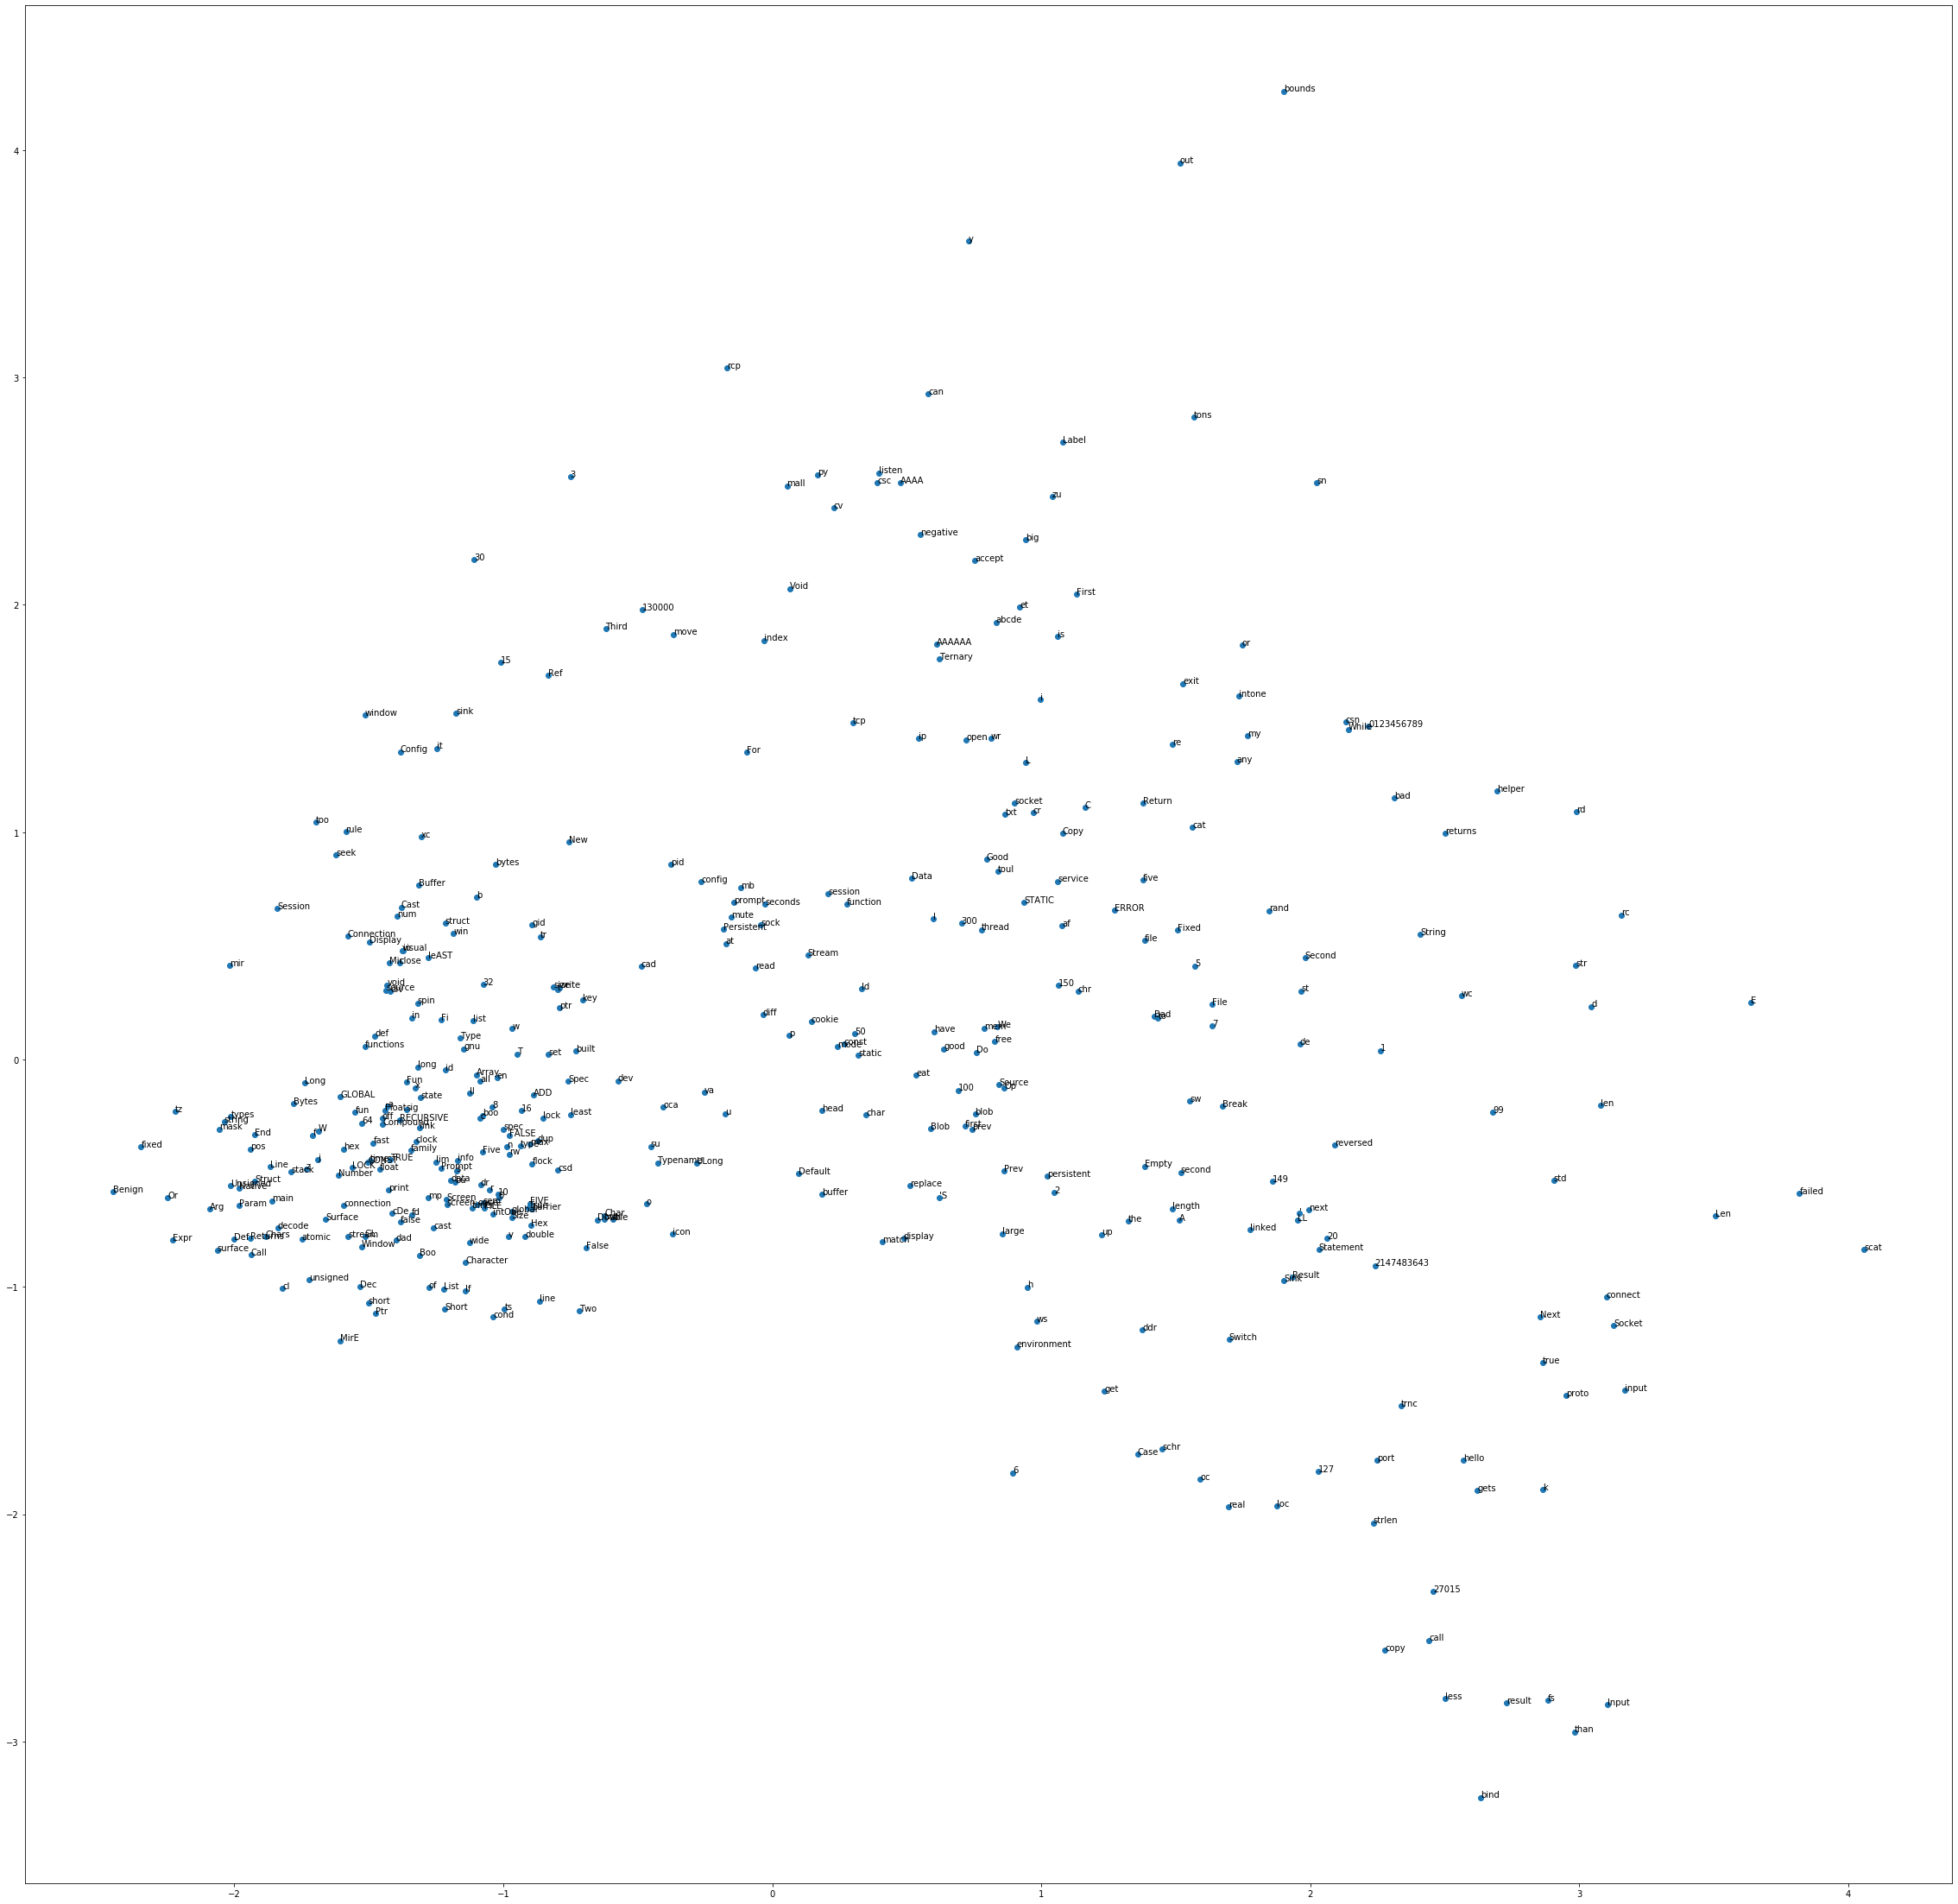

In [103]:
# 可视化 2-d
from sklearn.decomposition import PCA
# %matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt

# plt.figure() 
plt.figure(figsize=(40,40)) 
# 基于2d PCA拟合数据
embedding_cwe = w2v_199and399.wv.vectors  # 获取所有 tokens 的 embedding
pca = PCA(n_components=2)  # 维度 2，即二维平面展示
result = pca.fit_transform(embedding_cwe)  # 每次 tokens 的坐标点
# 可视化展示
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v_199and399.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
    

<IPython.core.display.Javascript object>


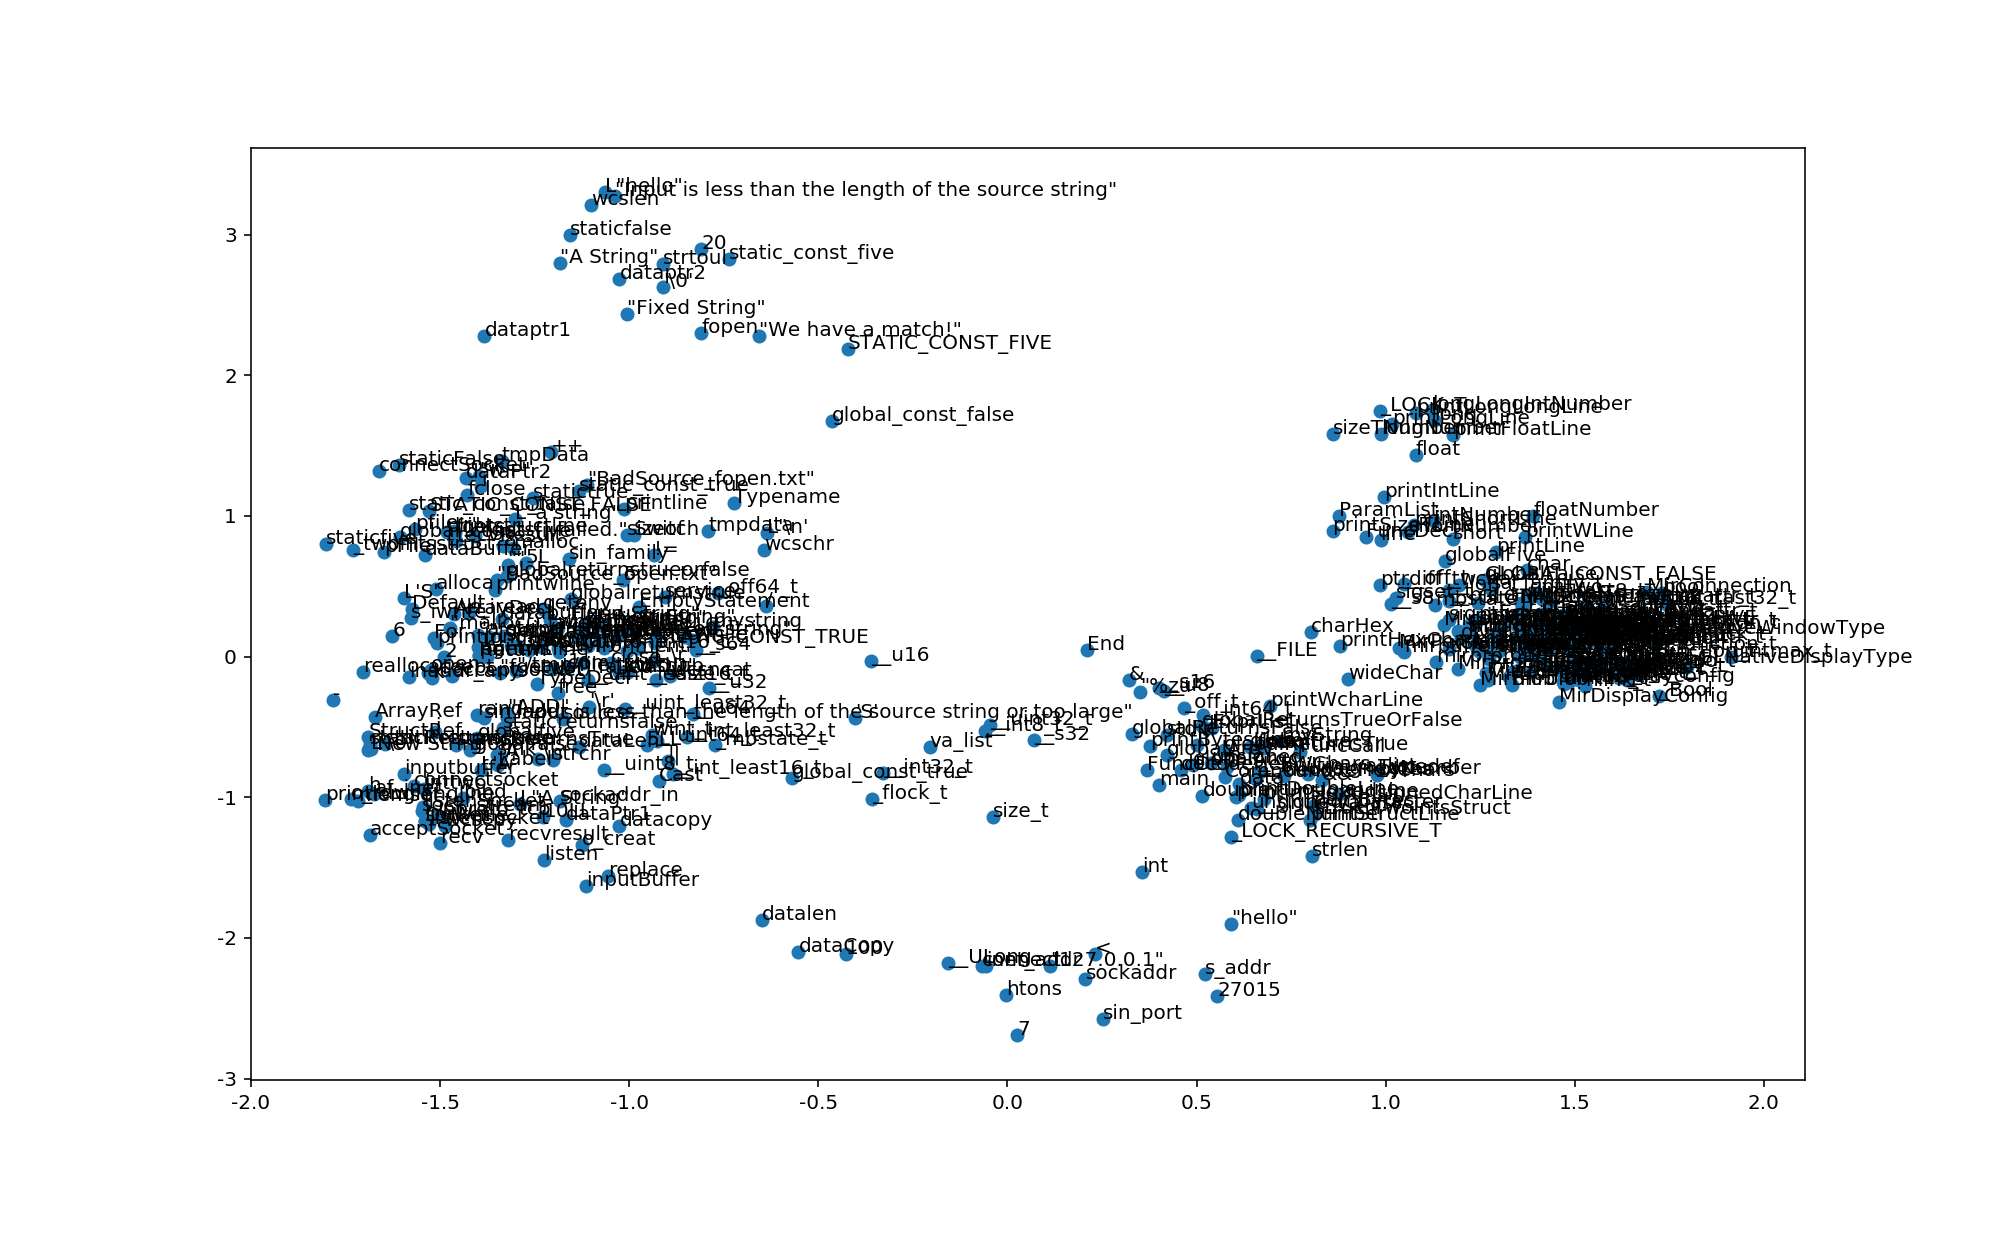

In [118]:

def fig(w2v):
    %matplotlib notebook
    plt.figure() 
    # plt.figure(figsize=(40,40)) 
    # 基于2d PCA拟合数据
    embedding_cwe = w2v.wv.vectors  # 获取所有 tokens 的 embedding
    pca = PCA(n_components=2)  # 维度 2，即二维平面展示
    result = pca.fit_transform(embedding_cwe)  # 每次 tokens 的坐标点
    # 可视化展示
    plt.scatter(result[:, 0], result[:, 1])
    words = list(w2v.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()
w=Word2Vec.load('data/embedding_cwe399_128.model')
fig(w)
# w2v_199and399_.wv.vocab

# 效果对比

In [ ]:
'''分析
CWE399：
    4:1:5，20轮就100%了
    
'''

## cwe399

In [3]:
results = train('data/cwe399_fortrain.pkl', embedding='data/embedding_cwe399.pkl', ratio='4:1:5', EPOCHS=20, BATCH_SIZE=128)
'''
'''


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  45, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  49, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6172
-bad(pred/true):   0/   9, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.7500
[Epoch: 1/20] train_loss: 0.598, train_acc: 0.693, val_loss: 0.575, val_acc: 0.696, Time Cost: 6.409 s
-bad(pred/true):   6/  45, fpr:0.0000, fnr:0.8667, precision:1.0000, recall:0.1333, F1:0.2353, acc:0.6953
-bad(pred/true):   4/  49, fpr:0.0000, fnr:0.9184, precision:1.0000, recall:0.0816, F1:0.1509, acc:0.6484
-bad(pred/true):   1/   9, fpr:0.0000, fnr:0.8889, precision:1.0000, recall:0.1111, F1:0.2000, acc:0.7778
[Epoch: 2/20] train_loss: 0.547, train_acc: 0.733, val_loss: 0.530, val_acc: 0.737, Time Cost: 6.025 s
-bad(pred/true):  12/  45, fpr:0.0000, fnr:0.7333, precision:1.0000, recall:0.2667, F1:0.4211, acc:0.7422
-bad(pred/true):  11/  49, fpr:0.0000, fnr:0.7755, p

'\n'

In [4]:
results = train('data/cwe399_fortrain.pkl', embedding='data/embedding_cwe399_plus.pkl', ratio='4:1:5', EPOCHS=20, BATCH_SIZE=128)


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  45, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  49, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6172
-bad(pred/true):   0/   9, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.7500
[Epoch: 1/20] train_loss: 0.602, train_acc: 0.693, val_loss: 0.577, val_acc: 0.696, Time Cost: 6.035 s
-bad(pred/true):   6/  45, fpr:0.0000, fnr:0.8667, precision:1.0000, recall:0.1333, F1:0.2353, acc:0.6953
-bad(pred/true):   5/  49, fpr:0.0000, fnr:0.8980, precision:1.0000, recall:0.1020, F1:0.1852, acc:0.6562
-bad(pred/true):   1/   9, fpr:0.0000, fnr:0.8889, precision:1.0000, recall:0.1111, F1:0.2000, acc:0.7778
[Epoch: 2/20] train_loss: 0.550, train_acc: 0.731, val_loss: 0.539, val_acc: 0.735, Time Cost: 6.175 s
-bad(pred/true):  14/  45, fpr:0.0120, fnr:0.7111, precision:0.9286, recall:0.2889, F1:0.4407, acc:0.7422
-bad(pred/true):   8/  49, fpr:0.0000, fnr:0.8367, p

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('train ', len(results['train']['epoch-0'][0]))
print('valid ', len(results['valid']['epoch-0'][0]))
print('test ', len(results['test'][0]))

# print(classification_report(results['train']['epoch-0'][0], results['train']['epoch-0'][1], target_names=['good', 'bad']))
# print(classification_report(results['valid']['epoch-0'][0], results['valid']['epoch-0'][1], target_names=['good', 'bad']))
# print(confusion_matrix(results['valid']['epoch-0'][0], results['valid']['epoch-0'][1]))

# print(classification_report(results['valid']['epoch-0'][0], results['valid']['epoch-0'][1], target_names=['good', 'bad']))
# print(confusion_matrix(results['valid']['epoch-0'][0], results['valid']['epoch-0'][1]))

print(classification_report(results['test'][0], results['test'][1], target_names=['good', 'bad']))
print(confusion_matrix(results['test'][0], results['test'][1]))



train  1828
valid  457
test  2285
              precision    recall  f1-score   support

        good       0.99      1.00      1.00      1637
         bad       1.00      0.98      0.99       648

    accuracy                           1.00      2285
   macro avg       1.00      0.99      0.99      2285
weighted avg       1.00      1.00      1.00      2285

[[1637    0]
 [  11  637]]


## cwe119

In [2]:
results = train('data/cwe119_fortrain.pkl', embedding='data/embedding_cwe119.pkl', ratio='4:1:5', EPOCHS=20, BATCH_SIZE=128)


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  46, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6406
-bad(pred/true):   0/  54, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.5781
-bad(pred/true):   0/  49, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6172
-bad(pred/true):   0/  55, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.5703
-bad(pred/true):   0/  37, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.7109
-bad(pred/true):   0/  51, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6016
-bad(pred/true):   0/  47, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6328
-bad(pred/true):   0/  42, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6719
-bad(pred/true):   0/  45, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  40, fpr:1.0000, fnr:0.0

In [3]:
results = train('data/cwe119_fortrain.pkl', embedding='data/embedding_cwe119_plus.pkl', ratio='4:1:5', EPOCHS=20, BATCH_SIZE=128)


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  46, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6406
-bad(pred/true):   0/  54, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.5781
-bad(pred/true):   0/  49, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6172
-bad(pred/true):   0/  55, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.5703
-bad(pred/true):   0/  37, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.7109
-bad(pred/true):   0/  51, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6016
-bad(pred/true):   0/  47, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6328
-bad(pred/true):   0/  42, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6719
-bad(pred/true):   0/  45, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  40, fpr:1.0000, fnr:0.0

## train()

In [ ]:
''' train()

results：
(train_result:{epoch:[[true_label], [predict]],epoch2:...}
valid_result:{epoch:[[true_label], [predict]],epoch2:...}
test_result:[true_label], [predict]
)
'''
import sys
# 引入依赖库
astnn_vul = '/home/bfs/cct/astnn/vuldetect/'
pycparser = '/home/bfs/cct/astnn/pycparser-master'

if astnn_vul not in sys.path:
    sys.path.extend([astnn_vul, pycparser])
    
import pycparser

import pandas as pd
import random
import torch
import time
import numpy as np
from gensim.models.word2vec import Word2Vec
from model import BatchProgramClassifier

from torch.autograd import Variable
from torch.utils.data import DataLoader
import os
import sys
from sklearn import metrics

def get_batch(dataset, idx, bs):
    '''
    从 dataset 中 获取 1 batch 数据（ bs 条样本），从 idx 开始
    并将 labels 从 int 型转成 torch.LongTensor 型，为什么呢？ 
    返回：特征集 data，标签集 labels
    '''
    tmp = dataset.iloc[idx: idx+bs]  # 实际得到的 tmp 大小可能小于 bs
    data, labels = [], []
    for _, item in tmp.iterrows():
        data.append(item['blocks'])
        # labels.append(item[2]-1)
        labels.append(item['label'])
    return data, torch.LongTensor(labels)

def train(dataset, embedding, ratio='4:1:5', EPOCHS=100, BATCH_SIZE=128, USE_GPU = True):
    results = {'train':{}, 'valid':{}, 'test':[]}
    # 超参数：
    HIDDEN_DIM = 100  # 隐藏层维度 100
    ENCODE_DIM = 128  # 编码层？维度 128，
    LABELS = 2  # 标签种类数量
#     EPOCHS = 100
#     BATCH_SIZE = 128
#     USE_GPU = True

    # 读词嵌入
    # word2vec = Word2Vec.load('data/embedding_cwe399_128.model').wv
    # embeddings = np.zeros((word2vec.vectors.shape[0] + 1, word2vec.vectors.shape[1]), dtype="float32")
    # embeddings[:word2vec.vectors.shape[0]] = word2vec.vectors
    # # embeddings 比 wv 多一行（即多一个token）,其值为全 0
    # MAX_TOKENS = word2vec.vectors.shape[0]  # token 种类数量
    # EMBEDDING_DIM = word2vec.vectors.shape[1]  # 词嵌入的维度，128维
    e = pd.read_pickle(embedding)
    embeddings = np.array([list(x) for x in e.values])
    MAX_TOKENS = embeddings.shape[0]-1  # 否则报错
    EMBEDDING_DIM = embeddings.shape[1]
    ''' The expanded size of the tensor (455) must match the existing size (454) at non-singleton dimension 0.  Target sizes: [455, 128].  Tensor sizes: [454, 128]'''

    # 读数据,划分比例
    data = pd.read_pickle(dataset)
    total_num = len(data)
    ratios = [int(r) for r in ratio.split(':')]
    train_split = int(ratios[0]/sum(ratios)*total_num)
    val_split = train_split + int(ratios[1]/sum(ratios)*total_num)
    # 划分
    train_data = data.iloc[:train_split] 
    val_data = data.iloc[train_split:val_split] 
    test_data = data.iloc[val_split:]
    
    
    # 创建模型，传入参数和词嵌入向量
    model = BatchProgramClassifier(EMBEDDING_DIM,HIDDEN_DIM,
                                    MAX_TOKENS+1,ENCODE_DIM,
                                    LABELS,BATCH_SIZE,
                                    USE_GPU, embeddings)
    if USE_GPU:
        model.cuda()  # 转成 gpu 模型

    parameters = model.parameters()  # 参数，
    optimizer = torch.optim.Adamax(parameters)  # 优化器，优化模型的参数
    loss_function = torch.nn.CrossEntropyLoss()  # 目标函数：交叉熵损失

    best_model = model


    # 训练
    train_loss_ = []  # 每轮的训练损失
    val_loss_ = []  # 每轮的验证损失
    train_acc_ = []  # 每轮的训练acc
    val_acc_ = []  # 每轮的验证acc
    best_acc = 0.0  # 最高的验证acc，后面没有对它进行更新？
#     EPOCHS = 40  # 40 轮就已经达到 0.998 了
    # training procedure
    for epoch in range(EPOCHS):  # 每轮
        result_train=[[],[]]
        result_valid=[[],[]]
        start_time = time.time()

        total_acc = total_loss = total = i = 0  # 重置标记
        # total：已训练样本的总个数，可能比 i 小。

        while i < len(train_data):  # 训练集的每批
            # 获取批数据
            batch = get_batch(train_data, i, BATCH_SIZE)
            i += BATCH_SIZE
            train_inputs, train_labels = batch
            if USE_GPU:  # 使用 gpu 时，将 labels 转成 gpu 张量
                train_inputs, train_labels = train_inputs, train_labels.cuda()

            # 模型设置
            model.zero_grad()  # 把模型中参数的梯度设为0
            model.batch_size = len(train_labels)  # 为什么不用 BATCH_SIZE ？
            model.hidden = model.init_hidden()  # 后面又不用它，赋值有什么意义？
            output = model(train_inputs)  # 预测结果，二维(64, 2)，即 64 个样本，2 种标签

            loss = loss_function(output, Variable(train_labels)) # 计算损失值
            loss.backward()  # 后向传播、计算梯度，更新参数？loss 是标量。
            optimizer.step()  # 开始优化，更新参数，降低 loss，

            # calc training acc
            _, predicted = torch.max(output.data, 1)  # 返回 output 中每行（样本标签）的最大预测值和最大值的索引
            total += len(train_labels)  # 实际已训练样本个数总和
            total_acc += (predicted == train_labels).sum()  # 将所有预测正确的样本个数总和
            total_loss += loss.item()*len(train_inputs)  # 将所有样本的损失总和
            
            result_train[0].extend(train_labels.tolist())
            result_train[1].extend(predicted.tolist())
            if i%(BATCH_SIZE*5) == 0:  # 每轮共有
                # 计算 precision、recall、accuracy、f1
                y_pred = predicted.tolist()
                y_true = train_labels.tolist()
                FPR_, recall_, thresholds = metrics.roc_curve(y_true, y_pred)
                FNR_ = 1 - recall_
                recall_ = metrics.recall_score(y_true, y_pred)
                precision_ = metrics.precision_score(y_true, y_pred)
                F1_ = metrics.f1_score(y_true, y_pred)
                acc_ = metrics.accuracy_score(y_true, y_pred)
                print('-bad(pred/true):%4d/%4d, fpr:%.4f, fnr:%.4f, precision:%.4f, recall:%.4f, F1:%.4f, acc:%.4f' 
                      %(sum(y_pred), sum(y_true), FPR_[1], FNR_[1], precision_, recall_, F1_, acc_))
        
        train_loss_.append(total_loss / total)  # 训练完一轮（所有样本）后的平均损失
        train_acc_.append(total_acc.item() / total)  # 训练完一轮（所有样本）后的平均准确率
        # 输出本轮的训练效果
    #         end_time = time.time()
    #     print('[Epoch: %2d/%2d] Training Loss: %.3f, Training Acc: %.3f, Time Cost: %.3f s'
    #           % (epoch + 1, EPOCHS, train_loss_[epoch], train_acc_[epoch], end_time - start_time))
        # 保存本轮训练结果
        results['train']['epoch-%d'%epoch] = result_train   
        
        # validation epoch
        total_acc = total_loss = total = i = 0  # 重置标记
        while i < len(val_data):  # 验证集的每批，代码与训练集的处理大同小异
            batch = get_batch(val_data, i, BATCH_SIZE)
            i += BATCH_SIZE
            val_inputs, val_labels = batch
            if USE_GPU:
                val_inputs, val_labels = val_inputs, val_labels.cuda()

            model.batch_size = len(val_labels)
            model.hidden = model.init_hidden()
            output = model(val_inputs)

            loss = loss_function(output, Variable(val_labels))

            # calc valing acc
            _, predicted = torch.max(output.data, 1)
            total_acc += (predicted == val_labels).sum()
            total += len(val_labels)
            total_loss += loss.item()*len(val_inputs)
            
            result_valid[0].extend(val_labels.tolist())
            result_valid[1].extend(predicted.tolist())

        val_loss_.append(total_loss / total)  # 验证集训练完一轮后的平均损失
        val_acc_.append(total_acc.item() / total)  # 验证集训练完一轮后的平均acc
        times = time.time() - start_time
        if total_acc/total > best_acc:  # 没有对 best_acc 的更新，代码有问题吧
            best_model = model
            best_acc = total_acc/total
        # 输出本轮的验证效果
        print('[Epoch:%2d/%2d] train_loss: %.3f, train_acc: %.3f, val_loss: %.3f, val_acc: %.3f, Time Cost: %.3f s'
              % (epoch + 1, EPOCHS, train_loss_[epoch], train_acc_[epoch], val_loss_[epoch], val_acc_[epoch], times))
        # 保存本轮验证结果
        results['valid']['epoch-%d'%epoch] = result_valid              

    # 测试。
    total_acc = total_loss = total = i = 0  # 重置标记
    model = best_model  # 使用在验证集上 acc 最高的模型进行测试
    metrics_index = ['FNR_', 'FNR_', 'precision_', 'recall_', 'F1_', 'acc_']
    res = {k:[] for k in ['FNR_', 'FNR_', 'precision_', 'recall_', 'F1_', 'acc_']}

    result_test=[[],[]]
    while i < len(test_data):
        batch = get_batch(test_data, i, BATCH_SIZE)
        i += BATCH_SIZE
        test_inputs, test_labels = batch
        if USE_GPU:
            test_inputs, test_labels = test_inputs, test_labels.cuda()

        model.batch_size = len(test_labels)
        model.hidden = model.init_hidden()
        output = model(test_inputs)

        loss = loss_function(output, Variable(test_labels))

        _, predicted = torch.max(output.data, 1)
        total_acc += (predicted == test_labels).sum()
        total += len(test_labels)
        total_loss += loss.item() * len(test_inputs)

        # 计算 precision、recall、accuracy、f1
        y_pred = predicted.tolist()
        y_true = test_labels.tolist()
        FPR_, recall_, thresholds = metrics.roc_curve(y_true, y_pred)
        FNR_ = 1 - recall_
        recall_ = metrics.recall_score(y_true, y_pred)
        precision_ = metrics.precision_score(y_true, y_pred)
        F1_ = metrics.f1_score(y_true, y_pred)
        acc_ = metrics.accuracy_score(y_true, y_pred)
        res['FPR_'] = FPR_
        res['FNR_'] = FNR_
        res['precision_'] = precision_
        res['recall_'] = recall_
        res['F1_'] = F1_
        res['acc_'] = acc_
        print('-bad(pred/true):%4d/%4d, fpr:%.4f, fnr:%.4f, precision:%.4f, recall:%.4f, F1:%.4f, acc:%.4f' 
          %(sum(y_pred), sum(y_true), FPR_[1], FNR_[1], precision_, recall_, F1_, acc_))
        
        result_test[0].extend(test_labels.tolist())
        result_test[1].extend(predicted.tolist())
    # 保存测试结果
    results['test'] = result_test 
 
    print("Testing results(Acc):", total_acc.item() / total)

    return results


In [ ]:
# # 将数据集中在训练时需要使用的数据保存，其他过滤掉，以加快文件加载速度。

# cwe399_df = pd.read_pickle('data/cwe399_c_all.pkl')
# cwe399_blocks_df = cwe399_df[['id', 'blocks', 'label']]
# cwe399_blocks_df['label'].replace({'good':0, 'bad':1}, inplace=True)
# cwe399_blocks_df_rd = cwe399_blocks_df.sample(frac=1, random_state=1)  # 随机乱序
# cwe399_blocks_df_rd.to_pickle('data/cwe399_fortrain.pkl')

# 分句进行树卷积


In [2]:
results = train('data/cwe119_fortrain.pkl', embedding='data/embedding_cwe119_plus.pkl', ratio='6:1:3', EPOCHS=20, BATCH_SIZE=128)


-bad(pred/true):   6/  44, fpr:0.0595, fnr:0.9773, precision:0.1667, recall:0.0227, F1:0.0400, acc:0.6250


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  40, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6875
-bad(pred/true):   0/  45, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  45, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  46, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6406
-bad(pred/true):   0/  46, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6406
-bad(pred/true):   0/  47, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6328
-bad(pred/true):   0/  53, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.5859
-bad(pred/true):   0/  48, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6250
-bad(pred/true):   0/  54, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.5781
-bad(pred/true):   0/  39, fpr:1.0000, fnr:0.0

In [4]:
results = train('data/cwe119_fortrain.pkl', embedding='data/embedding_cwe119.pkl', ratio='7:1:2', EPOCHS=20, BATCH_SIZE=200)


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  67, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6650
-bad(pred/true): 200/  68, fpr:1.0000, fnr:0.0000, precision:0.3400, recall:1.0000, F1:0.5075, acc:0.3400
-bad(pred/true):  16/  72, fpr:0.0938, fnr:0.9444, precision:0.2500, recall:0.0556, F1:0.0909, acc:0.6000
-bad(pred/true):   0/  71, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6450
-bad(pred/true):   0/  79, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6050
-bad(pred/true):   0/  79, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6050
-bad(pred/true):   0/  69, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6550
-bad(pred/true):   0/  65, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6750
-bad(pred/true):   0/  75, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6250
-bad(pred/true):   0/  70, fpr:1.0000, fnr:0.0

In [6]:
results = train('data/cwe119_fortrain.pkl', embedding='data/embedding_cwe119.pkl', ratio='7:1:2', EPOCHS=20, BATCH_SIZE=300)


-bad(pred/true): 297/ 101, fpr:0.9899, fnr:0.0099, precision:0.3367, recall:0.9901, F1:0.5025, acc:0.3400


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/ 106, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6467
-bad(pred/true):   0/ 109, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6367
-bad(pred/true):   0/ 120, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6000
-bad(pred/true):   0/  94, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6867
-bad(pred/true):   0/ 115, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6167
-bad(pred/true):   0/ 114, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6200
-bad(pred/true):   0/ 101, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6633
-bad(pred/true):   0/ 111, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6300
-bad(pred/true):   0/ 106, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6467
-bad(pred/true):   0/  89, fpr:1.0000, fnr:0.0

In [7]:
results = train('data/cwe119_fortrain.pkl', embedding='data/embedding_cwe119_plus.pkl', ratio='4:1:2', EPOCHS=20, BATCH_SIZE=256)


-bad(pred/true): 119/  84, fpr:0.4709, fnr:0.5476, precision:0.3193, recall:0.4524, F1:0.3744, acc:0.5039


/home/bfs/anaconda3/envs/astnn2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-bad(pred/true):   0/  90, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/  92, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6406
-bad(pred/true):   0/ 100, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6094
-bad(pred/true):   0/ 102, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6016
-bad(pred/true):  22/  74, fpr:0.0659, fnr:0.8649, precision:0.4545, recall:0.1351, F1:0.2083, acc:0.7031
-bad(pred/true):   0/ 100, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6094
-bad(pred/true):   0/  96, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6250
-bad(pred/true):   0/  90, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6484
-bad(pred/true):   0/ 100, fpr:1.0000, fnr:0.0000, precision:0.0000, recall:0.0000, F1:0.0000, acc:0.6094
-bad(pred/true):   0/  87, fpr:1.0000, fnr:0.0

In [1]:
''' train()

results：
(train_result:{epoch:[[true_label], [predict]],epoch2:...}
valid_result:{epoch:[[true_label], [predict]],epoch2:...}
test_result:[true_label], [predict]
)
'''
import sys
# 引入依赖库
astnn_vul = '/home/bfs/cct/astnn/vuldetect/'
pycparser = '/home/bfs/cct/astnn/pycparser-master'

if astnn_vul not in sys.path:
    sys.path.extend([astnn_vul, pycparser])
    
import pycparser

import pandas as pd
import random
import torch
import time
import numpy as np
from gensim.models.word2vec import Word2Vec
from model import BatchProgramClassifier

from torch.autograd import Variable
from torch.utils.data import DataLoader
import os
import sys
from sklearn import metrics

def get_batch(dataset, idx, bs):
    '''
    从 dataset 中 获取 1 batch 数据（ bs 条样本），从 idx 开始
    并将 labels 从 int 型转成 torch.LongTensor 型，为什么呢？ 
    返回：特征集 data，标签集 labels
    '''
    tmp = dataset.iloc[idx: idx+bs]  # 实际得到的 tmp 大小可能小于 bs
    data, labels = [], []
    for _, item in tmp.iterrows():
        data.append(item['blocks'])
        # labels.append(item[2]-1)
        labels.append(item['label'])
    return data, torch.LongTensor(labels)

def train(dataset, embedding, ratio='4:1:5', EPOCHS=100, BATCH_SIZE=128, USE_GPU = True):
    results = {'train':{}, 'valid':{}, 'test':[]}
    # 超参数：
    HIDDEN_DIM = 100  # 隐藏层维度 100
    ENCODE_DIM = 128  # 编码层？维度 128，
    LABELS = 2  # 标签种类数量
#     EPOCHS = 100
#     BATCH_SIZE = 128
#     USE_GPU = True

    # 读词嵌入
    # word2vec = Word2Vec.load('data/embedding_cwe399_128.model').wv
    # embeddings = np.zeros((word2vec.vectors.shape[0] + 1, word2vec.vectors.shape[1]), dtype="float32")
    # embeddings[:word2vec.vectors.shape[0]] = word2vec.vectors
    # # embeddings 比 wv 多一行（即多一个token）,其值为全 0
    # MAX_TOKENS = word2vec.vectors.shape[0]  # token 种类数量
    # EMBEDDING_DIM = word2vec.vectors.shape[1]  # 词嵌入的维度，128维
    e = pd.read_pickle(embedding)
    embeddings = np.array([list(x) for x in e.values])
    MAX_TOKENS = embeddings.shape[0]-1  # 否则报错
    EMBEDDING_DIM = embeddings.shape[1]
    ''' The expanded size of the tensor (455) must match the existing size (454) at non-singleton dimension 0.  Target sizes: [455, 128].  Tensor sizes: [454, 128]'''

    # 读数据,划分比例
    data = pd.read_pickle(dataset)
    total_num = len(data)
    ratios = [int(r) for r in ratio.split(':')]
    train_split = int(ratios[0]/sum(ratios)*total_num)
    val_split = train_split + int(ratios[1]/sum(ratios)*total_num)
    # 划分
    train_data = data.iloc[:train_split] 
    val_data = data.iloc[train_split:val_split] 
    test_data = data.iloc[val_split:]
    
    
    # 创建模型，传入参数和词嵌入向量
    model = BatchProgramClassifier(EMBEDDING_DIM,HIDDEN_DIM,
                                    MAX_TOKENS+1,ENCODE_DIM,
                                    LABELS,BATCH_SIZE,
                                    USE_GPU, embeddings)
    if USE_GPU:
        model.cuda()  # 转成 gpu 模型

    parameters = model.parameters()  # 参数，
    optimizer = torch.optim.Adamax(parameters)  # 优化器，优化模型的参数
    loss_function = torch.nn.CrossEntropyLoss()  # 目标函数：交叉熵损失

    best_model = model


    # 训练
    train_loss_ = []  # 每轮的训练损失
    val_loss_ = []  # 每轮的验证损失
    train_acc_ = []  # 每轮的训练acc
    val_acc_ = []  # 每轮的验证acc
    best_acc = 0.0  # 最高的验证acc，后面没有对它进行更新？
#     EPOCHS = 40  # 40 轮就已经达到 0.998 了
    # training procedure
    for epoch in range(EPOCHS):  # 每轮
        result_train=[[],[]]
        result_valid=[[],[]]
        start_time = time.time()

        total_acc = total_loss = total = i = 0  # 重置标记
        # total：已训练样本的总个数，可能比 i 小。

        while i < len(train_data):  # 训练集的每批
            # 获取批数据
            batch = get_batch(train_data, i, BATCH_SIZE)
            i += BATCH_SIZE
            train_inputs, train_labels = batch
            if USE_GPU:  # 使用 gpu 时，将 labels 转成 gpu 张量
                train_inputs, train_labels = train_inputs, train_labels.cuda()

            # 模型设置
            model.zero_grad()  # 把模型中参数的梯度设为0
            model.batch_size = len(train_labels)  # 为什么不用 BATCH_SIZE ？
            model.hidden = model.init_hidden()  # 后面又不用它，赋值有什么意义？
            output = model(train_inputs)  # 预测结果，二维(64, 2)，即 64 个样本，2 种标签

            loss = loss_function(output, Variable(train_labels)) # 计算损失值
            loss.backward()  # 后向传播、计算梯度，更新参数？loss 是标量。
            optimizer.step()  # 开始优化，更新参数，降低 loss，

            # calc training acc
            _, predicted = torch.max(output.data, 1)  # 返回 output 中每行（样本标签）的最大预测值和最大值的索引
            total += len(train_labels)  # 实际已训练样本个数总和
            total_acc += (predicted == train_labels).sum()  # 将所有预测正确的样本个数总和
            total_loss += loss.item()*len(train_inputs)  # 将所有样本的损失总和
            
            result_train[0].extend(train_labels.tolist())
            result_train[1].extend(predicted.tolist())
#             if i%(BATCH_SIZE*5) == 0:  # 每轮共有
            # 计算 precision、recall、accuracy、f1
            y_pred = predicted.tolist()
            y_true = train_labels.tolist()
            FPR_, recall_, thresholds = metrics.roc_curve(y_true, y_pred)
            FNR_ = 1 - recall_
            recall_ = metrics.recall_score(y_true, y_pred)
            precision_ = metrics.precision_score(y_true, y_pred)
            F1_ = metrics.f1_score(y_true, y_pred)
            acc_ = metrics.accuracy_score(y_true, y_pred)
            print('-bad(pred/true):%4d/%4d, fpr:%.4f, fnr:%.4f, precision:%.4f, recall:%.4f, F1:%.4f, acc:%.4f' 
                  %(sum(y_pred), sum(y_true), FPR_[1], FNR_[1], precision_, recall_, F1_, acc_))
        
        train_loss_.append(total_loss / total)  # 训练完一轮（所有样本）后的平均损失
        train_acc_.append(total_acc.item() / total)  # 训练完一轮（所有样本）后的平均准确率
        # 输出本轮的训练效果
    #         end_time = time.time()
    #     print('[Epoch: %2d/%2d] Training Loss: %.3f, Training Acc: %.3f, Time Cost: %.3f s'
    #           % (epoch + 1, EPOCHS, train_loss_[epoch], train_acc_[epoch], end_time - start_time))
        # 保存本轮训练结果
        results['train']['epoch-%d'%epoch] = result_train   
        
        # validation epoch
        total_acc = total_loss = total = i = 0  # 重置标记
        while i < len(val_data):  # 验证集的每批，代码与训练集的处理大同小异
            batch = get_batch(val_data, i, BATCH_SIZE)
            i += BATCH_SIZE
            val_inputs, val_labels = batch
            if USE_GPU:
                val_inputs, val_labels = val_inputs, val_labels.cuda()

            model.batch_size = len(val_labels)
            model.hidden = model.init_hidden()
            output = model(val_inputs)

            loss = loss_function(output, Variable(val_labels))

            # calc valing acc
            _, predicted = torch.max(output.data, 1)
            total_acc += (predicted == val_labels).sum()
            total += len(val_labels)
            total_loss += loss.item()*len(val_inputs)
            
            result_valid[0].extend(val_labels.tolist())
            result_valid[1].extend(predicted.tolist())

        val_loss_.append(total_loss / total)  # 验证集训练完一轮后的平均损失
        val_acc_.append(total_acc.item() / total)  # 验证集训练完一轮后的平均acc
        times = time.time() - start_time
        if total_acc/total > best_acc:  # 没有对 best_acc 的更新，代码有问题吧
            best_model = model
            best_acc = total_acc/total
        # 输出本轮的验证效果
        print('[Epoch:%2d/%2d] train_loss: %.3f, train_acc: %.3f, val_loss: %.3f, val_acc: %.3f, Time Cost: %.3f s'
              % (epoch + 1, EPOCHS, train_loss_[epoch], train_acc_[epoch], val_loss_[epoch], val_acc_[epoch], times))
        # 保存本轮验证结果
        results['valid']['epoch-%d'%epoch] = result_valid              

    # 测试。
    total_acc = total_loss = total = i = 0  # 重置标记
    model = best_model  # 使用在验证集上 acc 最高的模型进行测试
    metrics_index = ['FNR_', 'FNR_', 'precision_', 'recall_', 'F1_', 'acc_']
    res = {k:[] for k in ['FNR_', 'FNR_', 'precision_', 'recall_', 'F1_', 'acc_']}

    result_test=[[],[]]
    while i < len(test_data):
        batch = get_batch(test_data, i, BATCH_SIZE)
        i += BATCH_SIZE
        test_inputs, test_labels = batch
        if USE_GPU:
            test_inputs, test_labels = test_inputs, test_labels.cuda()

        model.batch_size = len(test_labels)
        model.hidden = model.init_hidden()
        output = model(test_inputs)

        loss = loss_function(output, Variable(test_labels))

        _, predicted = torch.max(output.data, 1)
        total_acc += (predicted == test_labels).sum()
        total += len(test_labels)
        total_loss += loss.item() * len(test_inputs)

        # 计算 precision、recall、accuracy、f1
        y_pred = predicted.tolist()
        y_true = test_labels.tolist()
        FPR_, recall_, thresholds = metrics.roc_curve(y_true, y_pred)
        FNR_ = 1 - recall_
        recall_ = metrics.recall_score(y_true, y_pred)
        precision_ = metrics.precision_score(y_true, y_pred)
        F1_ = metrics.f1_score(y_true, y_pred)
        acc_ = metrics.accuracy_score(y_true, y_pred)
        res['FPR_'] = FPR_
        res['FNR_'] = FNR_
        res['precision_'] = precision_
        res['recall_'] = recall_
        res['F1_'] = F1_
        res['acc_'] = acc_
        print('-bad(pred/true):%4d/%4d, fpr:%.4f, fnr:%.4f, precision:%.4f, recall:%.4f, F1:%.4f, acc:%.4f' 
          %(sum(y_pred), sum(y_true), FPR_[1], FNR_[1], precision_, recall_, F1_, acc_))
        
        result_test[0].extend(test_labels.tolist())
        result_test[1].extend(predicted.tolist())
    # 保存测试结果
    results['test'] = result_test 
 
    print("Testing results(Acc):", total_acc.item() / total)

    return results


# end